In [3]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [5]:
# Load dataset
df = pd.read_csv("insurance.csv")

# Display first 5 rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Dataset shape
print("Dataset shape:", df.shape)

# Data types and missing values
df.info()


Dataset shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


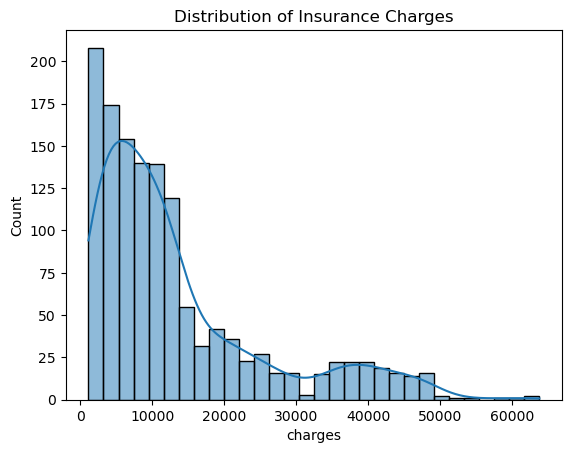

In [9]:
# Distribution of target variable
plt.figure()
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


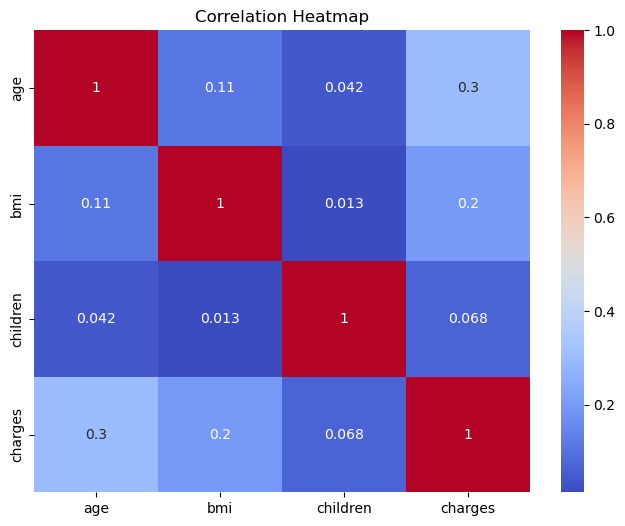

In [10]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [11]:
#Separate Features and Target
X = df.drop("charges", axis=1)
y = df["charges"]


In [12]:
#Encode Categorical Variables :
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [13]:
#Train-Test Split :
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [14]:
#Feature Scaling :
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Linear Regression :
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [16]:
#Evaluate Linear Regression  :
print("Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
RMSE: 5796.284659276274
MAE: 4181.1944737536505
R2 Score: 0.7835929767120722


In [17]:
# Random Forest Regressor  :
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [18]:
#Evaluate Random Forest :
print("Random Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
RMSE: 4586.935636079838
MAE: 2559.9014228678197
R2 Score: 0.8644756815249467


In [19]:
#Cross-Validation :
cv_scores = cross_val_score(
    rf, X_encoded, y,
    cv=5,
    scoring="r2"
)

print("Cross-Validation R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())


Cross-Validation R² scores: [0.85508333 0.77821571 0.87061118 0.82829381 0.85179409]
Mean R²: 0.8367996232987973


In [20]:
#Train XGBoost Model :
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [21]:
#evaluate xgboost :
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Performance")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost Performance
RMSE: 4413.8392643475645
MAE: 2456.7274848052557
R2 Score: 0.8745111997740955


In [22]:
#cross validation (xgboost)

cv_xgb = cross_val_score(
    xgb_model,
    X_encoded,
    y,
    cv=5,
    scoring="r2"
)

print("XGB CV R2 Scores:", cv_xgb)
print("Mean CV R2:", cv_xgb.mean())


XGB CV R2 Scores: [0.86763177 0.79285074 0.88020848 0.84428778 0.85689447]
Mean CV R2: 0.8483746458792438


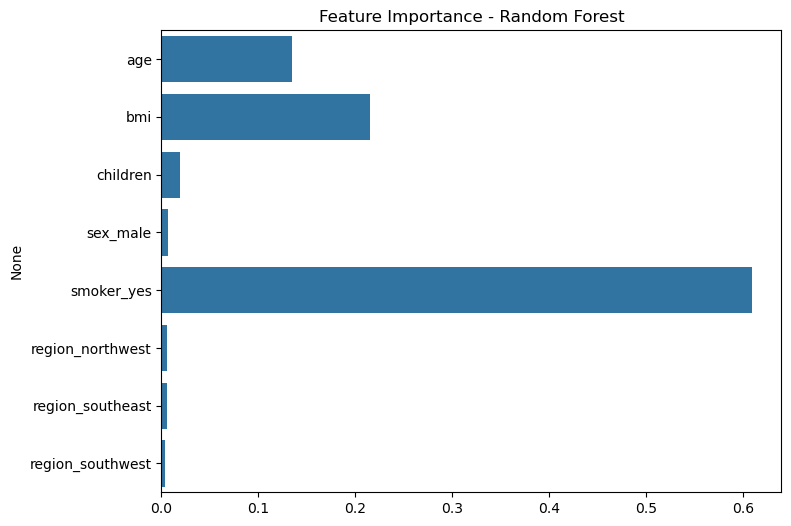

In [23]:
#Visualization of feature importance -random forest :

importances = rf.feature_importances_
features = X_encoded.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


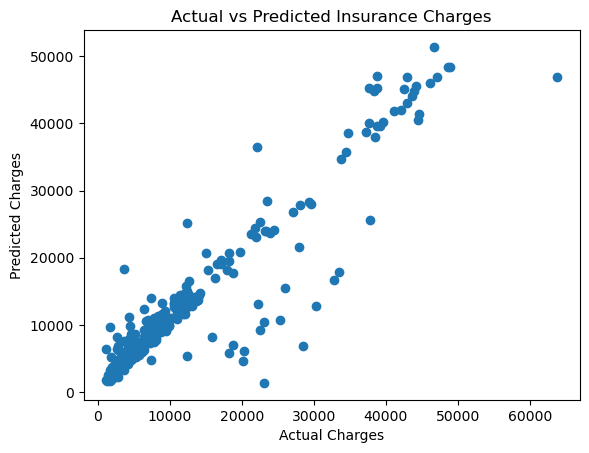

In [24]:
#Actual vs Predicted Plot :
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()


In [25]:
#Compare All Models :
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,5796.284659,0.783593
1,Random Forest,4586.935636,0.864476
2,XGBoost,4413.839264,0.874511


### 🔍 Final Insights & Conclusions

- Smoking status is the most influential feature affecting insurance charges.
- Ensemble models (Random Forest and XGBoost) significantly outperform Linear Regression.
- XGBoost achieves the best overall performance in terms of RMSE and R².
- This model can be used by insurance companies for risk-based premium estimation.
